# Initialise and Data Sort

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from statistics import mean
from sklearn.metrics import mean_squared_error

In [2]:
dfprep = pd.read_csv("data2.csv")
dfprep = dfprep.drop(dfprep.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1)
dfprep.drop(dfprep.tail(1).index,inplace=True)

In [3]:
dfprep['Date'] = pd.to_datetime(dfprep.Date , format = '%Y/%m/%d')
df = dfprep.drop(['Date'], axis=1)
df.index = dfprep.Date
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

# Data Analysis

In [78]:
from scipy.stats import kurtosis
print(df.describe())
print(np.var(df['Weight (tons)']))
print(kurtosis(df['Weight (tons)']))

       Weight (tons)  Weather (C)
count      63.000000    63.000000
mean       18.714762    14.526455
std        14.746733     8.850364
min         2.430000    -3.722222
25%         7.905000     6.388889
50%        16.810000    15.333333
75%        25.595000    22.777778
max        76.890000    27.111111
214.01428526077092
3.5228623212064543


# VAR https://towardsdatascience.com/prediction-task-with-multivariate-timeseries-and-var-model-47003f629f9

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.endog, steps=len(valid))

#print(prediction)
#np.savetxt("pred.csv", prediction, delimiter=",")

In [ ]:
#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

pred.index = dfprep.Date[int(0.7*(len(df))):]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred.loc[:,[i]], valid.loc[:,[i]])))
    
#make final predictions
#model = VAR(endog=df)
#model_fit = model.fit()
#yhat = model_fit.forecast(model_fit.y, steps=1)
#print(yhat)

# SARIMA https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [ ]:
dfprepSec = dfprep.copy()
dfprepSec['Date'] = pd.to_timedelta(dfprepSec['Date'])
dfprepSec['Date'] = dfprepSec['Date'].dt.total_seconds()

In [ ]:
dfprepNP = dfprepSec.to_numpy()
trainNP = dfprepNP[:int(0.7*(len(dfprepNP)))]
validNP = dfprepNP[int(0.7*(len(dfprepNP))):]

In [ ]:
trainWeight = trainNP[:,2]
trainWeather = trainNP[:,1]
validWeight = validNP[:,2]
validWeather = validNP[:,1]

In [ ]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset



# fit model
#model = SARIMAX(trainWeight, exog=None, order=(0,0,1), seasonal_order=(0,1,0,12)) 

model = SARIMAX(trainWeight, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 365))
#model = SARIMAX(trainWeight, exog=trainWeather, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
#model = SARIMAX(trainWeight, exog=trainWeather, order=(2, 1, 0), seasonal_order=(1,1,0,12))


model_fit = model.fit(disp=False)
#print(model_fit.summary())

#yhat = model_fit.forecast(19)

# make prediction

predict = model_fit.get_prediction()
predict_ci = predict.conf_int()
prediction = []
#for i in range(len(predict_ci)):
for i in range(len(validWeight)):
    prediction.append([mean(predict_ci[i])])
#print(prediction)

#pred = model_fit.get_prediction()
#print(pred.prediction_results)


#exog2 = [200 + random()]
#print(exog2)
#yhat = model_fit.predict(len(trainWeight), len(trainWeight)+18, exog=validWeather)
#print(yhat)


In [ ]:
#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=['Weight (tons)'])
for j in range(0,1):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

pred.index = dfprep.Date[int(0.7*(len(df))):]

print(sqrt(mean_squared_error(pred, valid['Weight (tons)'])))
#np.savetxt("pred.csv", prediction, delimiter=",")

# SARIMAX https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [ ]:
dfprepSec = dfprep.copy()
dfprepSec['Date'] = pd.to_timedelta(dfprepSec['Date'])
dfprepSec['Date'] = dfprepSec['Date'].dt.total_seconds()

In [ ]:
dfprepNP = dfprepSec.to_numpy()
trainNP = dfprepNP[:int(0.7*(len(dfprepNP)))]
validNP = dfprepNP[int(0.7*(len(dfprepNP))):]

In [ ]:
trainWeight = trainNP[:,2]
trainWeather = trainNP[:,1]
validWeight = validNP[:,2]
validWeather = validNP[:,1]

In [ ]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset



# fit model
model = SARIMAX(trainWeight, exog=trainWeather, order=(0,0,1), seasonal_order=(0,1,0,12)) #This is good

#model = SARIMAX(trainWeight, exog=trainWeather, order=(1, 0, 0), seasonal_order=(0, 0, 0, 365))
#model = SARIMAX(trainWeight, exog=trainWeather, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
#model = SARIMAX(trainWeight, exog=trainWeather, order=(2, 1, 0), seasonal_order=(1,1,0,12))


model_fit = model.fit(disp=False)
#print(model_fit.summary())

#yhat = model_fit.forecast(19)

# make prediction

predict = model_fit.get_prediction()
predict_ci = predict.conf_int()
prediction = []
#for i in range(len(predict_ci)):
for i in range(len(validWeight)):
    prediction.append([mean(predict_ci[i])])
#print(prediction)

#pred = model_fit.get_prediction()
#print(pred.prediction_results)


#exog2 = [200 + random()]
#print(exog2)
#yhat = model_fit.predict(len(trainWeight), len(trainWeight)+18, exog=validWeather)
#print(yhat)


In [ ]:
#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=['Weight (tons)'])
for j in range(0,1):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

pred.index = dfprep.Date[int(0.7*(len(df))):]

print(sqrt(mean_squared_error(pred, valid['Weight (tons)'])))
#np.savetxt("pred.csv", prediction, delimiter=",")

# NN https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [54]:
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [55]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

In [56]:
# load dataset
datasetPrep = pd.read_csv('data2.csv')

datasetPrep.drop(datasetPrep.tail(1).index,inplace=True)
datasetPrep = datasetPrep.drop(datasetPrep.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1)

datasetPrep['Date'] = pd.to_datetime(datasetPrep.Date , format = '%Y/%m/%d')
dataset = datasetPrep.drop(['Date'], axis=1)
dataset.index = datasetPrep.Date

values = dataset.values

In [57]:
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed = reframed.drop(reframed.columns[[3]], axis=1)


In [66]:
# split into train and test sets
values = reframed.values
n_train_months = int(0.7*(len(dataset))-1)
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(43, 1, 2) (43,) (19, 1, 2) (19,)


Train on 43 samples, validate on 19 samples
Epoch 1/75
 - 1s - loss: 0.5697 - val_loss: 0.5875
Epoch 2/75
 - 0s - loss: 0.5633 - val_loss: 0.5806
Epoch 3/75
 - 0s - loss: 0.5569 - val_loss: 0.5736
Epoch 4/75
 - 0s - loss: 0.5505 - val_loss: 0.5666
Epoch 5/75
 - 0s - loss: 0.5441 - val_loss: 0.5599
Epoch 6/75
 - 0s - loss: 0.5379 - val_loss: 0.5529
Epoch 7/75
 - 0s - loss: 0.5314 - val_loss: 0.5459
Epoch 8/75
 - 0s - loss: 0.5249 - val_loss: 0.5388
Epoch 9/75
 - 0s - loss: 0.5184 - val_loss: 0.5318
Epoch 10/75
 - 0s - loss: 0.5119 - val_loss: 0.5247
Epoch 11/75
 - 0s - loss: 0.5054 - val_loss: 0.5176
Epoch 12/75
 - 0s - loss: 0.4988 - val_loss: 0.5104
Epoch 13/75
 - 0s - loss: 0.4922 - val_loss: 0.5032
Epoch 14/75
 - 0s - loss: 0.4856 - val_loss: 0.4960
Epoch 15/75
 - 0s - loss: 0.4790 - val_loss: 0.4887
Epoch 16/75
 - 0s - loss: 0.4727 - val_loss: 0.4814
Epoch 17/75
 - 0s - loss: 0.4663 - val_loss: 0.4741
Epoch 18/75
 - 0s - loss: 0.4599 - val_loss: 0.4667
Epoch 19/75
 - 0s - loss: 0.4

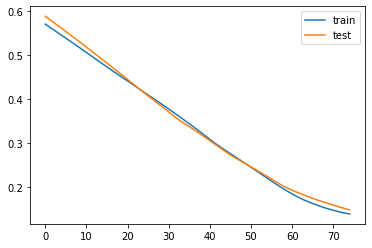

In [67]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=75, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [68]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.911


In [69]:
#converting predictions to dataframe
from copy import deepcopy
prediction = deepcopy(inv_y)
prediction = np.split(prediction, len(prediction))

cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=['Weight (tons)'])
for j in range(0,1):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

pred.index = dfprep.Date[int(0.7*(len(df))):]

#pred.index = dfprepDatelessone

#print(sqrt(mean_squared_error(pred, valid['Weight (tons)'])))
#np.savetxt("pred.csv", prediction, delimiter=",")

# Random Forest https://towardsdatascience.com/multivariate-time-series-forecasting-using-random-forest-2372f3ecbad1

In [ ]:
from sklearn.ensemble.forest import RandomForestRegressor


rgr = RandomForestRegressor(n_estimators=100, max_features=1, oob_score=True)

feat = train.index[:,None]
lab = train['Weight (tons)']#.index[:]

rgr.fit(feat, lab)
#rgr.fit(train.index, train['Weight (tons)'])

prediction = rgr.predict(feat)
prediction = np.split(prediction, len(prediction))

In [ ]:
#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(valid)),columns=['Weight (tons)'])
for j in range(0,1):
    for i in range(0, len(valid)):
        pred.iloc[i][j] = prediction[i][j]

pred.index = dfprep.Date[int(0.7*(len(df))):]

print(sqrt(mean_squared_error(pred, valid['Weight (tons)'])))
#np.savetxt("pred.csv", prediction, delimiter=",")

# Plot

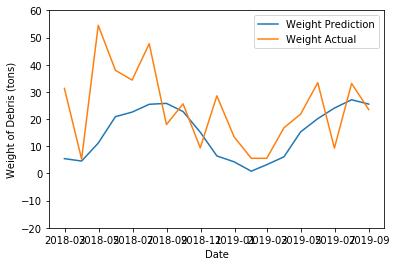

In [70]:
#plt.plot(pred.loc[:,['Weather (C)']], label = ('Weather Prediction'))
plt.plot(pred.loc[:,['Weight (tons)']], label = ('Weight Prediction'))
plt.legend()

#plt.plot(valid.loc[:,['Weather (C)']], label = ('Weather Actual'))
plt.plot(valid.loc[:,['Weight (tons)']], label = ('Weight Actual'))
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weight of Debris (tons)')

plt.ylim(-20,60)
plt.show()